In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Constant
RAW_DATA = "../data/raw/"
PROC_DATA= "../data/processed/"
RAW_DATA_FROM_DRIVE="https://drive.google.com/file/d/15DxBhlJwMT_yDiCh06b1AzNKgN9R_Xcw/view?usp=share_link"
PATH='https://drive.google.com/uc?export=download&id='+RAW_DATA_FROM_DRIVE.split('/')[-2]

In [ ]:
# Do not run this cell again after after successfully running it first on setup
raw_data = None
try:
    print("Make sure to connect to the internet. If you are not connected to internet press Ctrl+C and Try again.")
    print("Do not run any other cell before complete excecution of this cell. It will take 5min to 10min depends on your Internet connection!")
    raw_data=pd.read_csv(PATH)
    print("!!!!!!!!!Success!!!!!!!!!")
    print("Do not run this cell again after after successfully running it first time after the setup")
except:
    print("Something went wrong try again. Make sure you are connected to internet or file doesn't exist on given drive link")

In [ ]:
# This will work if everything work fine. If not this gives you a error
raw_data.info()

In [ ]:
data_luck = raw_data[raw_data.City=="Lucknow"]
data_del = raw_data[raw_data.City=="Delhi"]

In [ ]:
# This will prepare some raw data on your system to work with.
data_luck.to_csv(RAW_DATA+"raw_data_lucknow.csv", index=False)
data_del.to_csv(RAW_DATA+"raw_data_delhi.csv", index=False)

In [10]:
raw_data = pd.read_csv(RAW_DATA+"raw_data_delhi.csv")

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48192 entries, 0 to 48191
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        48192 non-null  object 
 1   Datetime    48192 non-null  object 
 2   PM2.5       47817 non-null  float64
 3   PM10        45771 non-null  float64
 4   NO          47894 non-null  float64
 5   NO2         47862 non-null  float64
 6   NOx         48167 non-null  float64
 7   NH3         47212 non-null  float64
 8   CO          47828 non-null  float64
 9   SO2         45340 non-null  float64
 10  O3          45991 non-null  float64
 11  Benzene     48154 non-null  float64
 12  Toluene     48166 non-null  float64
 13  Xylene      29288 non-null  float64
 14  AQI         47694 non-null  float64
 15  AQI_Bucket  47694 non-null  object 
dtypes: float64(13), object(3)
memory usage: 5.9+ MB


In [12]:
raw_data = raw_data.drop(['Xylene','Toluene','Benzene','O3','NH3','SO2'], axis=1)

In [14]:
raw_data.tail()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,CO,AQI,AQI_Bucket
48187,Delhi,2020-06-30 20:00:00,43.19,123.26,6.33,22.28,17.66,0.92,97.0,Satisfactory
48188,Delhi,2020-06-30 21:00:00,45.30,125.22,6.34,22.91,17.96,1.04,99.0,Satisfactory
48189,Delhi,2020-06-30 22:00:00,49.04,129.39,6.29,20.95,16.80,1.00,101.0,Moderate
48190,Delhi,2020-06-30 23:00:00,50.51,128.86,6.19,20.40,16.83,0.94,102.0,Moderate
48191,Delhi,2020-07-01 00:00:00,54.01,128.66,6.33,21.05,16.81,0.97,101.0,Moderate


In [15]:
raw_data.dropna(inplace=True)

In [16]:
raw_data.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
CO            0
AQI           0
AQI_Bucket    0
dtype: int64

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45586 entries, 15 to 48191
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        45586 non-null  object 
 1   Datetime    45586 non-null  object 
 2   PM2.5       45586 non-null  float64
 3   PM10        45586 non-null  float64
 4   NO          45586 non-null  float64
 5   NO2         45586 non-null  float64
 6   NOx         45586 non-null  float64
 7   CO          45586 non-null  float64
 8   AQI         45586 non-null  float64
 9   AQI_Bucket  45586 non-null  object 
dtypes: float64(7), object(3)
memory usage: 3.8+ MB


In [18]:
raw_data.to_csv(PROC_DATA+"processed_data_delhi.csv", index=False)

In [19]:
df = pd.read_csv(PROC_DATA+"processed_data_delhi.csv")
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,CO,AQI,AQI_Bucket
0,Delhi,2015-01-01 16:00:00,211.51,340.66,13.09,37.08,47.07,15.24,456.0,Severe
1,Delhi,2015-01-01 17:00:00,191.12,257.40,15.44,38.40,51.24,13.11,450.0,Severe
2,Delhi,2015-01-01 18:00:00,218.44,351.01,22.85,44.73,59.26,18.35,446.0,Severe
3,Delhi,2015-01-01 19:00:00,296.80,600.95,69.20,47.76,101.68,16.67,475.0,Severe
4,Delhi,2015-01-01 20:00:00,336.43,714.63,148.42,46.31,171.10,12.17,480.0,Severe


<AxesSubplot: xlabel='AQI', ylabel='PM2.5'>

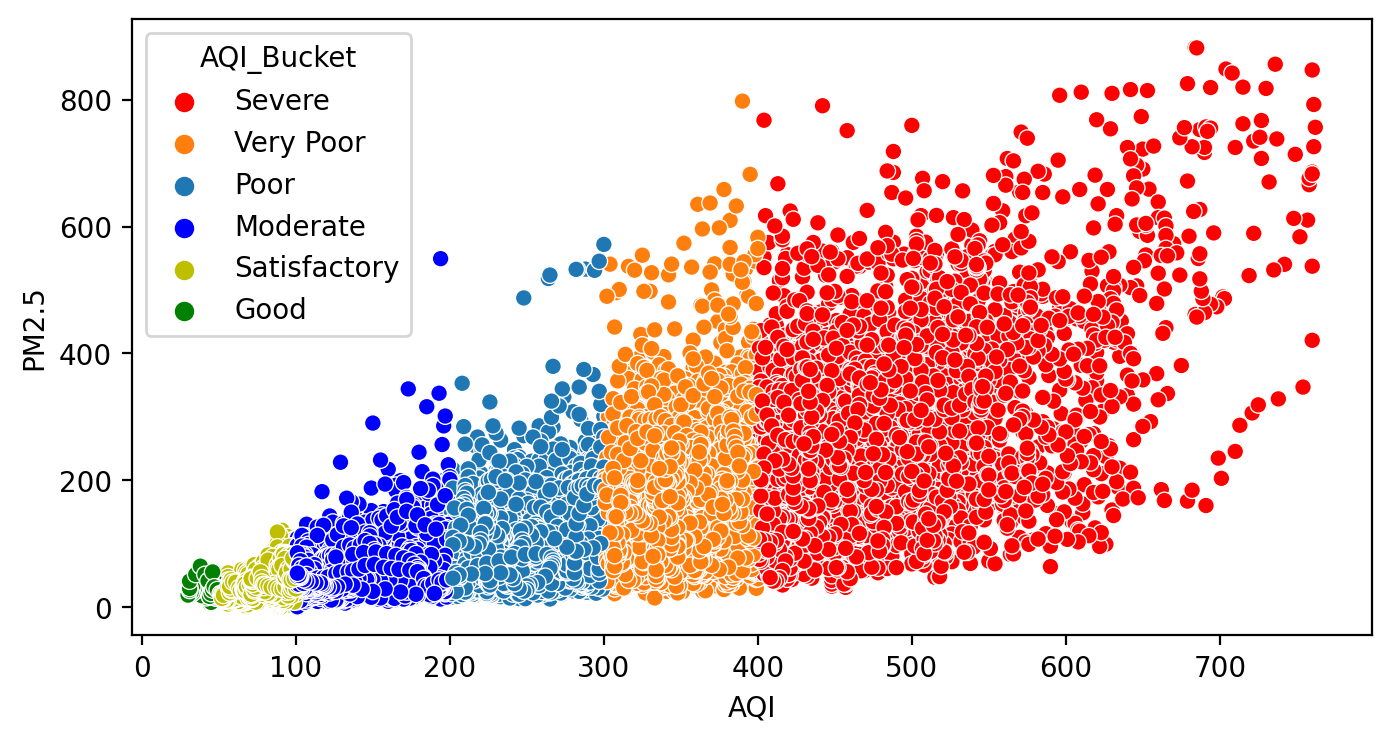

In [21]:
plt.figure(figsize=(8,4),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'PM2.5', data=df, hue ='AQI_Bucket', palette = palette)

<Figure size 1600x800 with 0 Axes>

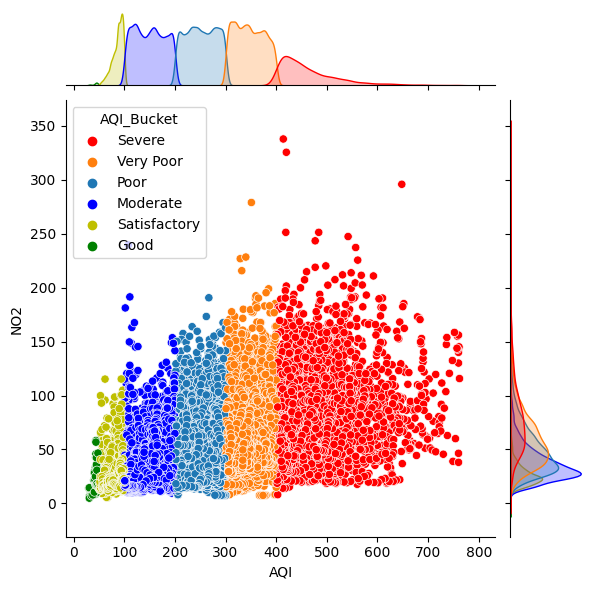

In [27]:
plt.figure(figsize=(8,4),dpi=200)
sns.jointplot(data=df, x="AQI", y="NO2", hue="AQI_Bucket", palette = palette)

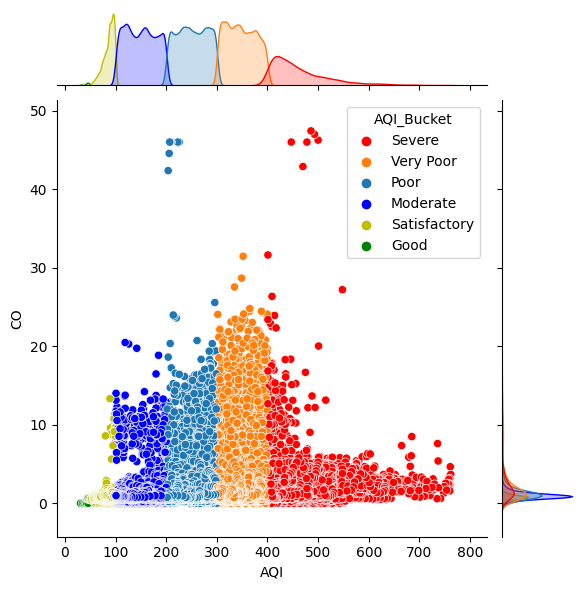

In [28]:
sns.jointplot(data=df, x="AQI", y="CO", hue="AQI_Bucket", palette = palette)

In [29]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,CO,AQI,AQI_Bucket
0,Delhi,2015-01-01 16:00:00,211.51,340.66,13.09,37.08,47.07,15.24,456.0,Severe
1,Delhi,2015-01-01 17:00:00,191.12,257.40,15.44,38.40,51.24,13.11,450.0,Severe
2,Delhi,2015-01-01 18:00:00,218.44,351.01,22.85,44.73,59.26,18.35,446.0,Severe
3,Delhi,2015-01-01 19:00:00,296.80,600.95,69.20,47.76,101.68,16.67,475.0,Severe
4,Delhi,2015-01-01 20:00:00,336.43,714.63,148.42,46.31,171.10,12.17,480.0,Severe


In [30]:
X = df.drop(['AQI_Bucket', "Datetime", "City"], axis=1)

In [31]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,CO,AQI
0,211.51,340.66,13.09,37.08,47.07,15.24,456.0
1,191.12,257.40,15.44,38.40,51.24,13.11,450.0
2,218.44,351.01,22.85,44.73,59.26,18.35,446.0
3,296.80,600.95,69.20,47.76,101.68,16.67,475.0
4,336.43,714.63,148.42,46.31,171.10,12.17,480.0


In [32]:
y = df['AQI_Bucket']

In [33]:
y.head()

0    Severe
1    Severe
2    Severe
3    Severe
4    Severe
Name: AQI_Bucket, dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()
y = le.fit_transform(y)

In [34]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
Scaler = StandardScaler()

In [49]:
scaled_X_train = Scaler.fit_transform(X_train)
scaled_X_test = Scaler.transform(X_test)

In [50]:
scaled_X_train

array([[-0.48117052,  0.1589946 , -0.11632946, ...,  0.01218619,
        -0.34873423,  0.12166423],
       [ 0.04737548,  0.35772821,  0.45042784, ...,  1.11335547,
         0.04314539,  0.18045331],
       [ 1.1294472 ,  0.43438664,  1.90526298, ...,  0.96631322,
        -0.18841984,  0.82713329],
       ...,
       [ 1.0686179 ,  0.52895788,  4.12486476, ...,  4.62156916,
         0.78771666,  1.57459456],
       [ 2.214968  ,  0.96676422,  1.47762603, ...,  0.72371412,
        -0.32379644,  1.07908653],
       [ 4.3114885 , -1.11775249, -0.46017802, ..., -0.90487138,
        -0.7192386 ,  0.14685955]])

In [56]:
from sklearn.svm import SVC

In [53]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [57]:
svc = SVC(kernel="linear", random_state=0, gamma="scale") #{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [58]:
svc.fit(scaled_X_train, y_train)

SVC(kernel='linear', random_state=0)

In [59]:
y_pred = svc.predict(scaled_X_test)

In [60]:
y_pred.shape

(13676,)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[   6    0    0   13    0    0]
 [   0 3516    1   37    0    0]
 [   0    7 3585    0    0    6]
 [   0    8    0 1018    0    0]
 [   0    0    0    0 1777   10]
 [   0    0   20    0    2 3670]]


0.9923954372623575

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [64]:
y_pred

array([5, 5, 2, ..., 5, 1, 2])

In [65]:
x=np.arange(0,len(y_test))

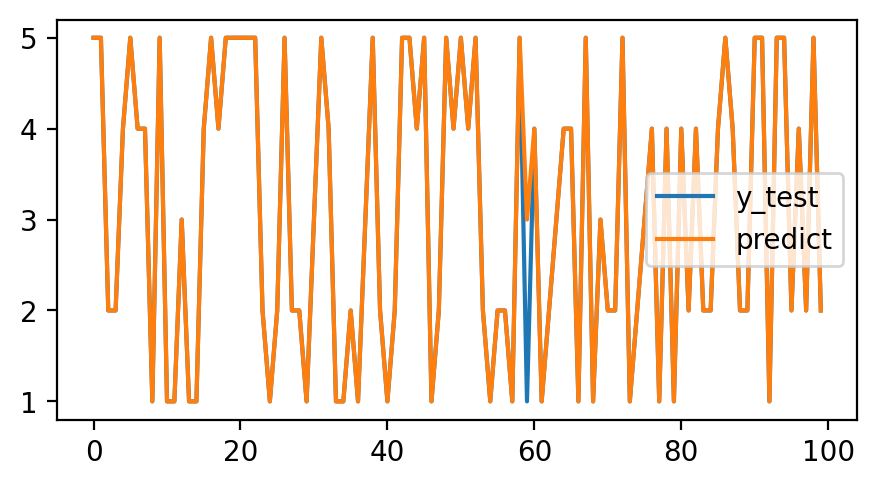

In [77]:
fig = plt.figure(figsize =(4,2), dpi=200)

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x[:100], y_test[:100], label='y_test')
axes.plot(x[:100], y_pred[:100], label='predict')
plt.legend()
plt.show()

In [71]:
data = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

In [72]:
index = ['y_pred', 'y_test']

In [73]:
dataf = pd.DataFrame(data, columns=index)

In [74]:
dataf.head()

,y_pred,y_test
0,5,5
1,5,5
2,2,2
3,2,2
4,4,4


In [78]:
import pickle

In [80]:
with open('../models/model_pkl', 'wb') as files:
    pickle.dump(svc, files)

In [ ]:
# # load saved model
# with open('model_pkl' , 'rb') as f:
#     lr = pickle.load(f)